In [3]:
!pip install pmdarima

     |████████████████████████████████| 1.4 MB 6.8 MB/s 
     |████████████████████████████████| 9.8 MB 22.7 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


In [1]:
#Standard Imports
from statsmodels.tsa.seasonal import seasonal_decompose
from pmdarima import auto_arima
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/appravi18/TimeSeriesAnalysis_Intro/main/airline_passengers.csv',index_col='Month')
df.index.freq = 'MS'

In [3]:
am = auto_arima(
             df['Thousands of Passengers'],
             seasonal=True, #our data is of course seasonal
             m=12,#this parameters sets cycle length as 12 months
             trace=True #set this param to see what values are tried
             )

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,1,1)[12]             : AIC=1020.048, Time=3.92 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=1031.508, Time=0.05 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=1020.393, Time=0.44 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=1021.003, Time=0.51 sec
 ARIMA(2,1,2)(0,1,1)[12]             : AIC=1019.935, Time=1.98 sec
 ARIMA(2,1,2)(0,1,0)[12]             : AIC=1019.290, Time=0.77 sec
 ARIMA(2,1,2)(1,1,0)[12]             : AIC=1019.546, Time=2.27 sec
 ARIMA(1,1,2)(0,1,0)[12]             : AIC=1024.160, Time=0.51 sec
 ARIMA(2,1,1)(0,1,0)[12]             : AIC=1017.847, Time=0.47 sec
 ARIMA(2,1,1)(1,1,0)[12]             : AIC=1017.914, Time=1.91 sec
 ARIMA(2,1,1)(0,1,1)[12]             : AIC=1018.359, Time=1.77 sec
 ARIMA(2,1,1)(1,1,1)[12]             : AIC=1018.248, Time=3.83 sec
 ARIMA(1,1,1)(0,1,0)[12]             : AIC=1022.393, Time=0.27 sec
 ARIMA(2,1,0)(0,1,0)[12]             : AIC=1022.393, Time=0.12 sec
 ARIMA(3,1,1)(0,1,0

In [4]:
# after the model is created, we split the dataframe 
# into train and test sets
train = df[:120]
test = df[120:
]
model = SARIMAX(train,
                order=(2,1,1),
                seasonal_order=(0,1,0,12)
               )
results = model.fit()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


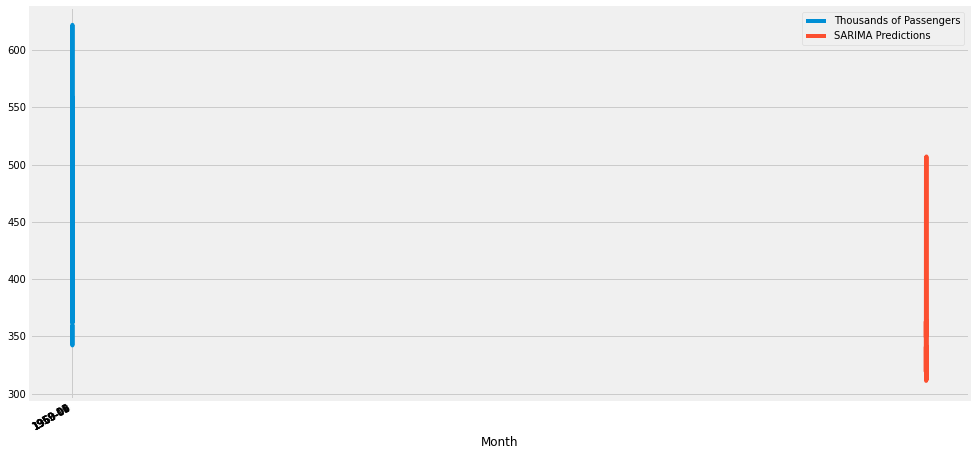

In [5]:
#run predictions now
predictions = results.predict(
                start=len(train),
                end=len(train)+len(test)-1,
                typ='levels').rename('SARIMA Predictions')
test.plot(figsize=(15,8),legend=True)
predictions.plot(legend=True)

In [6]:
#Trying to predict the change in Passengers from previous year
from statsmodels.tsa.statespace.tools import diff
df_diff = pd.DataFrame(
                 diff(
                      df['Thousands of Passengers'],
                      k_diff=1,
                      seasonal_periods=12
                )
          )

In [8]:
am_diff = auto_arima(
                     df_diff['Thousands of Passengers'],
                     seasonal=True,
                     m=12,
                     trace=True,
                     stationary=True)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,0,1)[12] intercept   : AIC=inf, Time=6.23 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=1415.278, Time=0.08 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=inf, Time=1.96 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=1299.257, Time=1.28 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=1413.909, Time=0.02 sec
 ARIMA(0,0,1)(0,0,0)[12] intercept   : AIC=1398.827, Time=0.61 sec
 ARIMA(0,0,1)(1,0,1)[12] intercept   : AIC=1146.801, Time=2.04 sec
 ARIMA(0,0,1)(1,0,0)[12] intercept   : AIC=1146.154, Time=1.94 sec
 ARIMA(0,0,1)(2,0,0)[12] intercept   : AIC=1146.333, Time=4.25 sec
 ARIMA(0,0,1)(2,0,1)[12] intercept   : AIC=inf, Time=4.22 sec
 ARIMA(0,0,0)(1,0,0)[12] intercept   : AIC=inf, Time=1.08 sec
 ARIMA(1,0,1)(1,0,0)[12] intercept   : AIC=inf, Time=3.03 sec
 ARIMA(0,0,2)(1,0,0)[12] intercept   : AIC=1148.149, Time=1.38 sec
 ARIMA(1,0,2)(1,0,0)[12] intercept   : AIC=inf, Time=2.64 sec
 ARIMA(0,0,1)(1,0,0)[12]             : AIC=1144.1

/usr/local/lib/python3.7/dist-packages/pmdarima/arima/_auto_solvers.py:522: ModelFitWarning: Error fitting  ARIMA(3,0,2)(1,0,0)[12]           (if you do not want to see these warnings, run with error_action="ignore").
Traceback:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/pmdarima/arima/_auto_solvers.py", line 506, in _fit_candidate_model
    fit.fit(y, X=X, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/pmdarima/arima/arima.py", line 597, in fit
    self._fit(y, X, **fit_args)
  File "/usr/local/lib/python3.7/dist-packages/pmdarima/arima/arima.py", line 518, in _fit
    fit, self.arima_res_ = _fit_wrapper()
  File "/usr/local/lib/python3.7/dist-packages/pmdarima/arima/arima.py", line 512, in _fit_wrapper
    **fit_args)
  File "/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/mlemodel.py", line 709, in fit
    skip_hessian=True, **kwargs)
  File "/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py", line

 ARIMA(3,0,2)(1,0,0)[12]             : AIC=inf, Time=nan sec
 ARIMA(2,0,1)(1,0,0)[12] intercept   : AIC=inf, Time=0.87 sec

Best model:  ARIMA(2,0,1)(1,0,0)[12]          
Total fit time: 59.240 seconds


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'


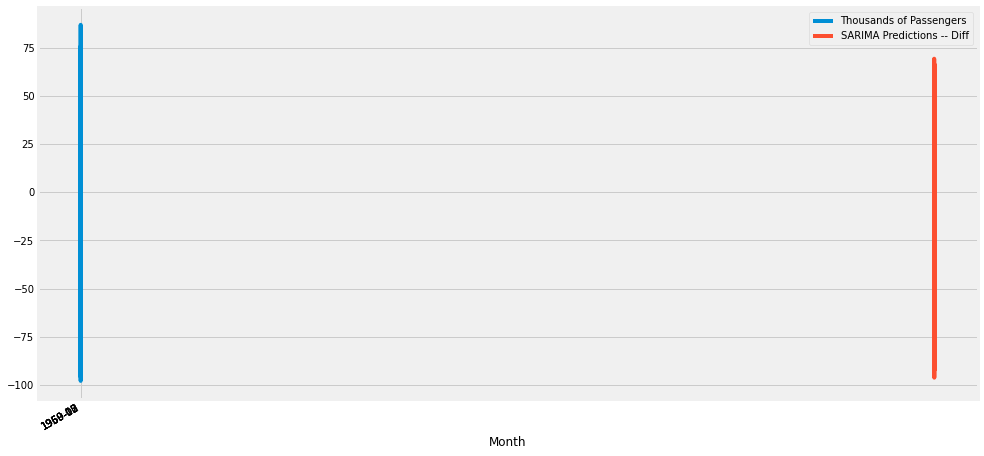

In [9]:
#train/test split for the df_diff
train_diff = df_diff[:120]
test_diff = df_diff[120:]
#New Sarimax model
model_diff = SARIMAX(
                     train_diff['Thousands of Passengers'],
                     order=(2,0,1),
                     seasonal_order=(1,0,0,12))
results_diff = model_diff.fit()
#run predictions now
predictions_diff = results_diff.predict(
                start=len(train_diff),
                end=len(train_diff)+len(test_diff)-1,
                typ='levels').rename('SARIMA Predictions -- Diff')
#plot the diffs
test_diff.plot(figsize=(15,8),legend=True)
predictions_diff.plot(legend=True)

In [10]:
from sklearn.metrics import mean_squared_error
from math import sqrt
error = mean_squared_error(
                           test['Thousands of Passengers'],
                           predictions)
print(f'SARIMAX: RMSE Error: {sqrt(error):5.5}')

SARIMAX: RMSE Error: 75.436


In [11]:
error_diff = mean_squared_error(
                               test_diff['Thousands of Passengers'], 
                               predictions_diff)
print(f'SARIMAX-Diff: RMSE Error: {sqrt(error_diff):5.5}')

SARIMAX-Diff: RMSE Error: 18.891
